*Experiment* 6 : Evaluation of Diffrent Optimizers on MNIST dataset

EXPERIMENT 6

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

11493376/11490434 [==============================] - 0s 0us/step
X_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0

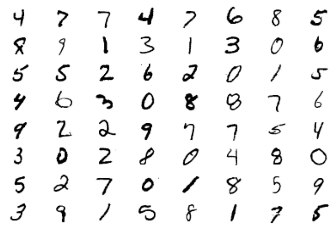

In [4]:
(x_train, y_train) , (x_test , y_test) = mnist.load_data()
x_train_drawing = x_train
print("X_train:" , x_train[0])
print("Y_train:" , y_train[0])
print("X_train shape:" , x_train.shape)
print("Y_train shape:" , y_train.shape)



image_size = 784 #28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0] , image_size)
print("After reshaping")
print("X_Train Shape:", x_train.shape)
print("X_Test Shape:", x_test.shape)


#Converting Class vectors to Binary Class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train , num_classes)

y_test = keras.utils.to_categorical(y_test , num_classes)
print(y_train.shape)
print(y_train[0])

for i in range(64):
  ax = plt.subplot(8 , 8 , i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap = 'Greys')

In [3]:
model = Sequential()
model.add(Dense(units = 2048, activation = 'sigmoid' , input_shape = (image_size,)))
model.add(Dense(units = num_classes, activation = 'softmax' , input_shape = (image_size,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


Optimizer: STOCHASTIC GRADIENT DECENT

In [ ]:
model.compile(optimizer = "sgd" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train ,  y_train, batch_size = 128 , epochs =100 , verbose = True , validation_split = .1)

Epoch 1/100
422/422 [==============================] - 10s 23ms/step - loss: 0.7685 - accuracy: 0.7850 - val_loss: 0.2505 - val_accuracy: 0.9363
Epoch 2/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2739 - accuracy: 0.9259 - val_loss: 0.1999 - val_accuracy: 0.9472
Epoch 3/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2118 - accuracy: 0.9443 - val_loss: 0.1751 - val_accuracy: 0.9540
Epoch 4/100
422/422 [==============================] - 9s 22ms/step - loss: 0.1735 - accuracy: 0.9550 - val_loss: 0.1631 - val_accuracy: 0.9553
Epoch 5/100
422/422 [==============================] - 9s 22ms/step - loss: 0.1483 - accuracy: 0.9627 - val_loss: 0.1496 - val_accuracy: 0.9592
Epoch 6/100
422/422 [==============================] - 10s 23ms/step - loss: 0.1294 - accuracy: 0.9699 - val_loss: 0.1431 - val_accuracy: 0.9605
Epoch 7/100
422/422 [==============================] - 10s 23ms/step - loss: 0.1090 - accuracy: 0.9751 - val_loss: 0.1392 - val_accura

In [5]:
loss , accuraacy = model.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 1s 4ms/step - loss: 0.1183 - accuracy: 0.9646


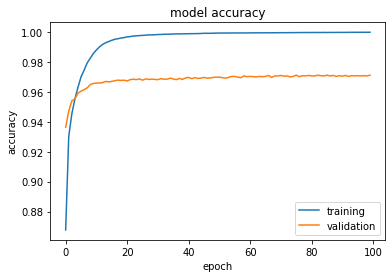

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

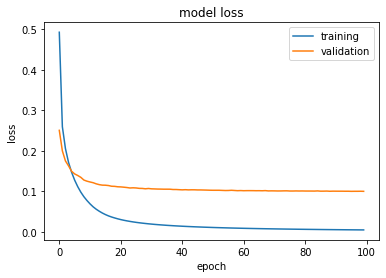

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

Optimizer2 : RMSProp

In [ ]:
model2 = Sequential()
model2.add(Dense(units = 2048, activation = 'sigmoid' , input_shape = (image_size,)))
model2.add(Dense(units = num_classes, activation = 'softmax' , input_shape = (image_size,)))
model2.summary()

In [12]:
model2.compile(optimizer = "RMSprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model2.fit(x_train ,  y_train, batch_size = 64 , epochs =60 , verbose = True , validation_split = .1)

Epoch 1/60
844/844 [==============================] - 20s 23ms/step - loss: 0.0889 - accuracy: 0.9782 - val_loss: 0.1161 - val_accuracy: 0.9757
Epoch 2/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0806 - accuracy: 0.9792 - val_loss: 0.1300 - val_accuracy: 0.9752
Epoch 3/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0854 - accuracy: 0.9790 - val_loss: 0.1478 - val_accuracy: 0.9713
Epoch 4/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0915 - accuracy: 0.9785 - val_loss: 0.1387 - val_accuracy: 0.9713
Epoch 5/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0803 - accuracy: 0.9800 - val_loss: 0.1248 - val_accuracy: 0.9732
Epoch 6/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0846 - accuracy: 0.9788 - val_loss: 0.1223 - val_accuracy: 0.9753
Epoch 7/60
844/844 [==============================] - 19s 23ms/step - loss: 0.0806 - accuracy: 0.9795 - val_loss: 0.1400 - val_accuracy:

In [13]:
loss , accuraacy = model2.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 1s 4ms/step - loss: 0.1519 - accuracy: 0.9702


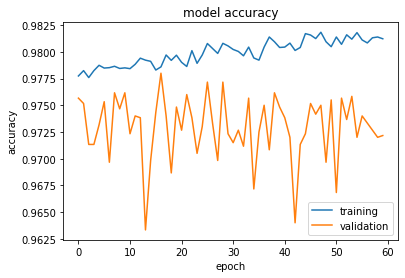

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

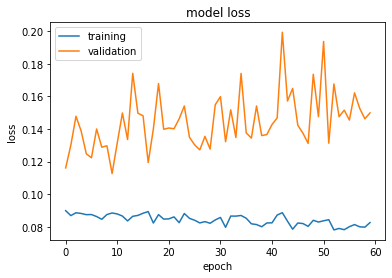

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

Optimizer 3 : Adam

In [5]:
model3 = Sequential()
model3.add(Dense(units = 2048, activation = 'sigmoid' , input_shape = (image_size,)))
model3.add(Dense(units = num_classes, activation = 'softmax' , input_shape = (image_size,)))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [6]:
model3.compile(optimizer = "Adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model3.fit(x_train ,  y_train, batch_size = 128 , epochs =100 , verbose = True , validation_split = .1)

Epoch 1/100
422/422 [==============================] - 5s 5ms/step - loss: 0.4546 - accuracy: 0.8647 - val_loss: 0.2122 - val_accuracy: 0.9427
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.2314 - accuracy: 0.9348 - val_loss: 0.1841 - val_accuracy: 0.9518
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 0.2095 - accuracy: 0.9416 - val_loss: 0.1560 - val_accuracy: 0.9580
Epoch 4/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1850 - accuracy: 0.9472 - val_loss: 0.1633 - val_accuracy: 0.9560
Epoch 5/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1777 - accuracy: 0.9475 - val_loss: 0.1565 - val_accuracy: 0.9563
Epoch 6/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1753 - accuracy: 0.9476 - val_loss: 0.1437 - val_accuracy: 0.9583
Epoch 7/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1700 - accuracy: 0.9496 - val_loss: 0.1501 - val_accuracy: 0.9550

In [7]:
loss , accuraacy = model3.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 1s 3ms/step - loss: 0.1183 - accuracy: 0.9687


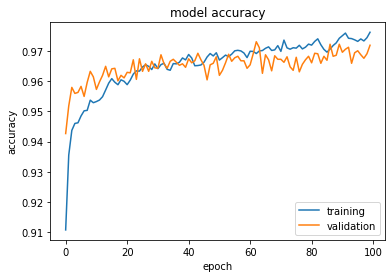

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

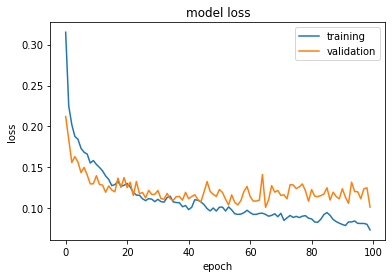

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

Optimizer 4 : Adagrad 

In [10]:
model4 = Sequential()
model4.add(Dense(units = 2048, activation = 'sigmoid' , input_shape = (image_size,)))
model4.add(Dense(units = num_classes, activation = 'softmax' , input_shape = (image_size,)))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [11]:
model4.compile(optimizer = "Adagrad" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model4.fit(x_train ,  y_train, batch_size = 256 , epochs =100 , verbose = True , validation_split = .1)

Epoch 1/100
211/211 [==============================] - 2s 6ms/step - loss: 1.4511 - accuracy: 0.5663 - val_loss: 0.5553 - val_accuracy: 0.8775
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 0.5633 - accuracy: 0.8656 - val_loss: 0.4079 - val_accuracy: 0.9033
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 0.4355 - accuracy: 0.8915 - val_loss: 0.3482 - val_accuracy: 0.9140
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3704 - accuracy: 0.9081 - val_loss: 0.3157 - val_accuracy: 0.9213
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3381 - accuracy: 0.9163 - val_loss: 0.2937 - val_accuracy: 0.9253
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3060 - accuracy: 0.9239 - val_loss: 0.2779 - val_accuracy: 0.9302
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.2866 - accuracy: 0.9297 - val_loss: 0.2659 - val_accuracy: 0.9313

In [12]:
loss , accuraacy = model4.evaluate(x_test, y_test , verbose = True )

313/313 [==============================] - 1s 3ms/step - loss: 0.1704 - accuracy: 0.9461


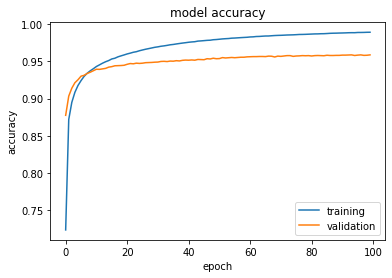

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()

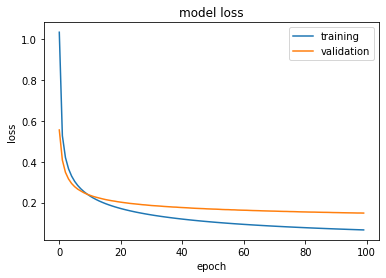

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training' , 'validation'] , loc = 'best')
plt.show()